In [1]:
import pandas as pd
import numpy as np 
import os
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px


In [2]:
#Gather the data from SQLite database, by establishing the conncetion firt
con=sqlite3.connect(r"D:\5.DataAnalysis\2\Project 5--__ Amazon Customers Data Analysis-20230402T133903Z-001\Project 5--_ Amazon Customers Data Analysis\database.sqlite")
type(con)


sqlite3.Connection

In [4]:
#Read the data from sql query
az_df=pd.read_sql_query('SELECT * FROM Reviews' , con)
az_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
az_df.shape

(568454, 10)

In [10]:
az_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
#Check if there is any null values
az_df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

## 1 - Conduct a sentiment analysis on the given data and identify the predominant emotion expressed in it.

In [11]:
#To deal with text data,and do sentiment analysis we can use number of libraries, however, TextBlob will be used
from textblob import TextBlob

In [12]:
text = az_df['Summary'][0]
text

'Good Quality Dog Food'

In [14]:
# A value for each Summary will be given based on the library defention
#This score can range from -1 (indicating negative sentiment) to +1 (indicating positive sentiment)
#with a score of 0 indicating neutral sentiment. 
#The algorithm considers various linguistic features such as words, phrases, and grammatical structures to determine 

TextBlob(az_df['Summary'][0]).sentiment.polarity

0.7

In [23]:
#To apply it for the whole col, a function can be created
def sentiment_polarity(col):
    return TextBlob(col).sentiment.polarity

In [24]:
az_df['polarity'] = az_df['Summary'].apply(sentiment_polarity)

In [27]:
az_df[['Summary' , 'polarity']]

,Summary,polarity
0,Good Quality Dog Food,0.70
1,Not as Advertised,0.00
2,"""Delight"" says it all",0.00
3,Cough Medicine,0.00
4,Great taffy,0.80
...,...,...
568449,Will not do without,0.00
568450,disappointed,-0.75
568451,Perfect for our maltipoo,1.00
568452,Favorite Training and reward treat,0.50


## 2- Conduct an exploratory data analysis (EDA) on the subset of summaries that express  negative and positive sentiment.

In [31]:
#We can create a new variables saving the Positive Feedbacks', Neutral  Feedbacks and Negative Feedbacks
positive_az_data= az_df[az_df['polarity'] > 0]
ok_az_data= az_df[az_df['polarity']==0]
negative_az_data= az_df[az_df['polarity']< 0]

In [ ]:
#Pie chart to give us an overview at the distrbtion of the feedbacks
labels = ['Positive Feedbacks', 'Neutral  Feedbacks', 'Negative Feedbacks']
values = [len(positive_az_data), len(ok_az_data), len(negative_az_data)]
px.pie(data_frame=az_df, names=labels , values=values , title ='Sentiment distribution in Amazon data')

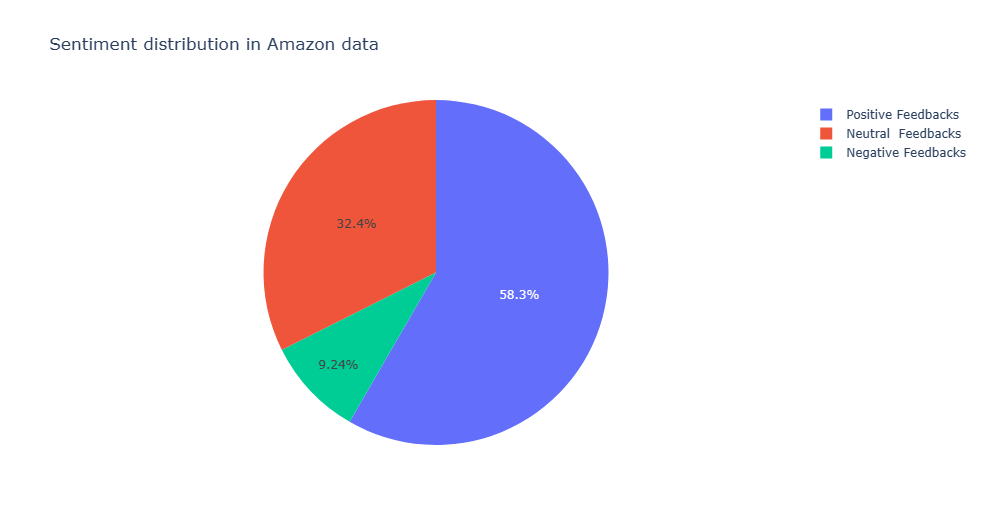

In [36]:
# A wordcloud can be created to see the most used phrases in the data, this can be created by using wordcloud 
from wordcloud import WordCloud,STOPWORDS

In [42]:
#let's define the stepwords, which will be removed later from the wordcloud
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [45]:
#Creat one whole pharagraph for all the summary seperated by a ' '
total_text = (' '.join(positive_az_data['Summary']))
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [47]:
import re

In [51]:
# using the re.sub() method from the re module in Python to perform a regular expression-based substitution on the total_text string.
#The regular expression [^a-zA-Z] matches any character that is not an uppercase or lowercase letter. The second argument to re.sub()
#is the replacement string, which is a single space character in this case.
re.sub('[^a-zA-Z]', ' ',total_text[0:1000])


'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [53]:
total_text_re=re.sub('[^a-zA-Z]', ' ' ,total_text)

In [55]:
#The white spaces can be removed using the following:
re.sub(' +', ' ',total_text_re[0:1000])

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste'

In [56]:
total_text_f=re.sub(' +', ' ',total_text_re)

(-0.5, 999.5, 499.5, -0.5)

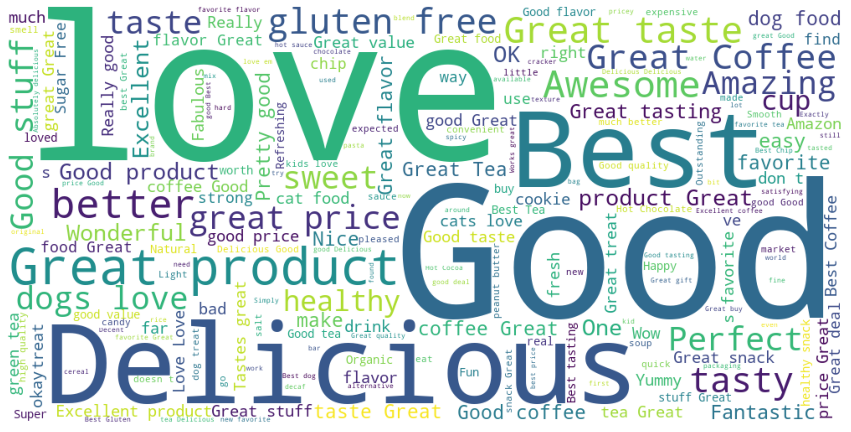

In [57]:
plt.figure(figsize=(15,10))
WordCloud(width=1000,height=500,stopwords=stopwords,background_color='white').generate(total_text_f)
cloud= WordCloud(width=1000,height=500,stopwords=stopwords,background_color='white').generate(total_text_f)
plt.imshow(cloud)
plt.axis('off')

In [58]:
#The exact same can be done for the negative sumaries 

(-0.5, 999.5, 499.5, -0.5)

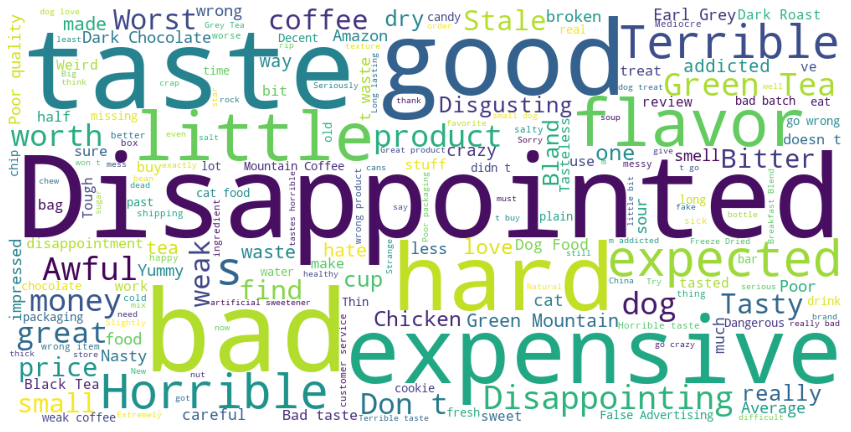

In [60]:
total_text_n = (' '.join(negative_az_data['Summary']))
total_text_nre=re.sub('[^a-zA-Z]', ' ' ,total_text_n)
total_text_nrf=re.sub(' +', ' ',total_text_nre)
plt.figure(figsize=(15,10))
cloud_n= WordCloud(width=1000,height=500,stopwords=stopwords,background_color='white').generate(total_text_nrf)
plt.imshow(cloud_n)
plt.axis('off')

## 3- Which user is Amazon most likely to recommend more products to?

In [61]:
az_df['UserId']

0         A3SGXH7AUHU8GW
1         A1D87F6ZCVE5NK
2          ABXLMWJIXXAIN
3         A395BORC6FGVXV
4         A1UQRSCLF8GW1T
               ...      
568449    A28KG5XORO54AY
568450    A3I8AFVPEE8KI5
568451    A121AA1GQV751Z
568452     A3IBEVCTXKNOH
568453    A3LGQPJCZVL9UC
Name: UserId, Length: 568454, dtype: object

In [62]:
az_df['UserId'].nunique()

256059

In [73]:
#group by the userID and aggregate the count of Summary and the mean of the Score
az_df.groupby('UserId').agg({'Summary' : 'count', 'Score':'mean'}).sort_values(by='Summary',ascending=False)

,Summary,Score
UserId,,
A3OXHLG6DIBRW8,448,4.535714
A1YUL9PCJR3JTY,421,4.494062
AY12DBB0U420B,389,4.647815
A281NPSIMI1C2R,365,4.841096
A1Z54EM24Y40LL,256,4.453125
...,...,...
A2HROKQO0GA5AF,1,3.000000
A2HROR28DMJV2W,1,5.000000
A2HRR8CO2Y20G8,1,5.000000


In [75]:
#Rename the columns names and chose the top 10 users to see their values
user_raw = az_df.groupby('UserId').agg({'Summary' : 'count', 'Score':'mean'}).sort_values(by='Summary',ascending=False)
user_raw.columns=['No of purchased','Avg score']
Top10users= user_raw[:10].reset_index()

In [76]:
Top10users

,UserId,No of purchased,Avg score
0,A3OXHLG6DIBRW8,448,4.535714
1,A1YUL9PCJR3JTY,421,4.494062
2,AY12DBB0U420B,389,4.647815
3,A281NPSIMI1C2R,365,4.841096
4,A1Z54EM24Y40LL,256,4.453125
5,A1TMAVN4CEM8U8,204,4.833333
6,A2MUGFV2TDQ47K,201,3.751244
7,A3TVZM3ZIXG8YW,199,1.000000
8,A3PJZ8TU8FDQ1K,178,4.601124
9,AQQLWCMRNDFGI,176,3.954545


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

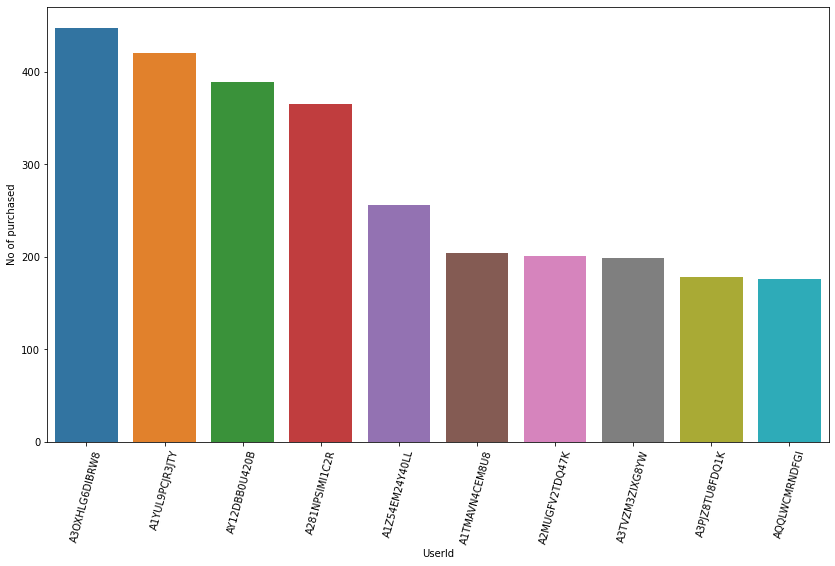

In [78]:
plt.figure(figsize=(14,8))
sns.barplot(x='UserId' , y='No of purchased' , data =Top10users )
plt.xticks(rotation=75)


## 4- Analyze the ratings for the product 

In [89]:
az_df[['Score']]

,Score
0,5
1,1
2,4
3,2
4,5
...,...
568449,5
568450,2
568451,5
568452,5


In [83]:
az_df.groupby('Score').size().reset_index(name='counts')

,Score,counts
0,1,52268
1,2,29769
2,3,42640
3,4,80655
4,5,363122


In [85]:
px.pie(az_df.groupby('Score').size().reset_index(name='counts') , names='Score' , values='counts')

## 5-analyze the length of comments in the dataset and from that, the behavior of the customers?

In [93]:
az_df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568454, dtype: object

In [97]:
len(az_df['Text'][0])


263

In [106]:
len(az_df['Text'][0].split(' '))

49

In [107]:
#To find the lenght of each row in the text col, we can use a fucntion 
def calculate_lenght(text):
     return len(text.split(' '))

In [108]:
az_df['Text_lenght']=az_df['Text'].apply(calculate_lenght)

In [111]:
az_df['Text_lenght'].describe()

count    568454.000000
mean         82.005522
std          80.807102
min           3.000000
25%          34.000000
50%          58.000000
75%         100.000000
max        3526.000000
Name: Text_lenght, dtype: float64

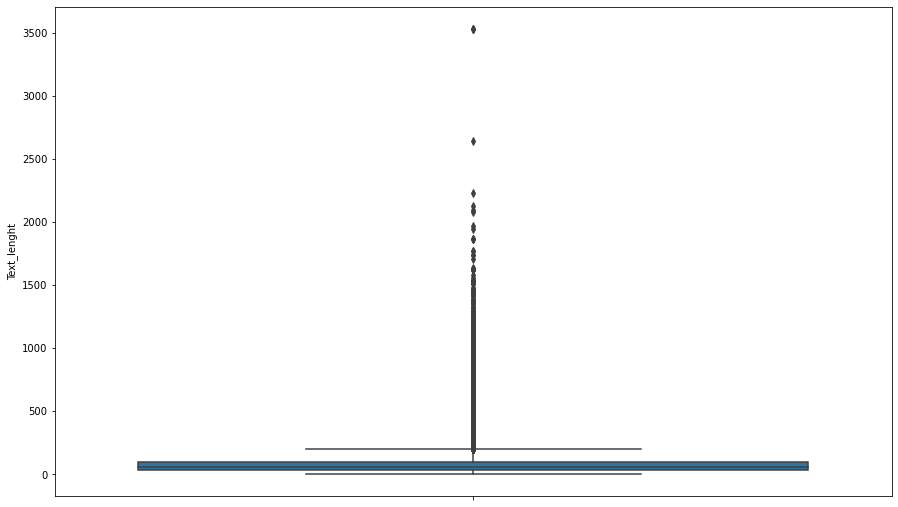

In [116]:
plt.figure(figsize=(15,9))
sns.boxplot(y='Text_lenght' , data=az_df,)

In [119]:
az_df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [123]:
#To represet the text in a wordcloud, we need to do some pre-processing 
# 1- Removing the puncuations
import string
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [124]:
data = az_df['Text'][0]
no_punc = ''
for char in data:
    if char not in punctuation:
        no_punc += char
no_punc

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than  most'

In [126]:
##to apply it dor the entire col we need to use a function
def remove_punc(data):
    no_punc =''
    for char in data:
        if char not in punctuation:
            no_punc+=char
    return no_punc

In [127]:
az_df['Text_no_p']=az_df['Text'].apply(remove_punc)

In [138]:
az_df['Text_no_p'].str.contains('\+').sum()

0

In [139]:
comments_in_words = ' '.join(az_df['Text_no_p'])

(-0.5, 999.5, 499.5, -0.5)

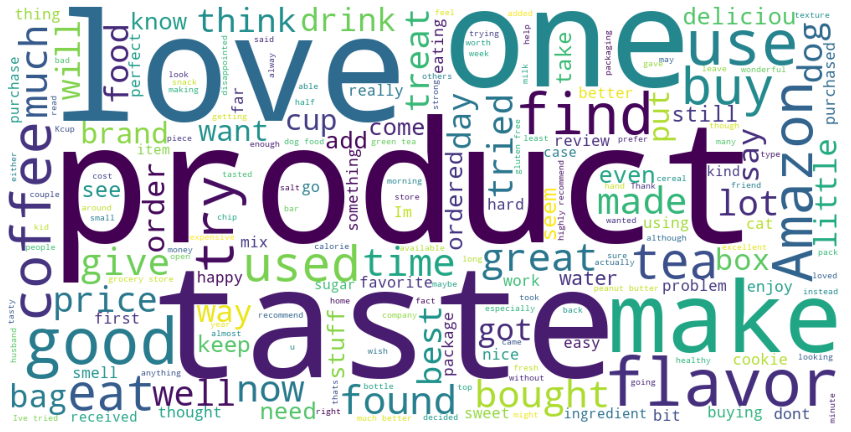

In [141]:
plt.figure(figsize=(15,10))
cloud= WordCloud(width=1000,height=500,stopwords=stopwords,background_color='white').generate(comments_in_words)
plt.imshow(cloud)
plt.axis('off')